In [12]:
import pandas as pd
sales_df = pd.read_csv("./data/Advertising.csv")

In [13]:
sales_df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
sales_df.shape

(200, 5)

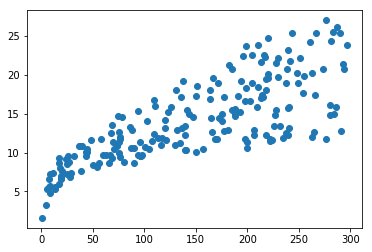

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.scatter(sales_df["TV"], sales_df["Sales"]);

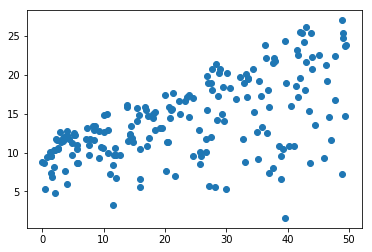

In [16]:
plt.scatter(sales_df["Radio"], sales_df["Sales"]);

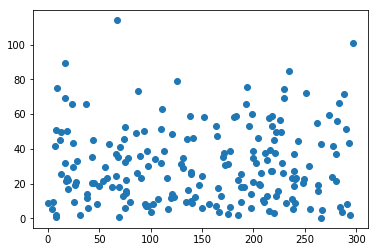

In [17]:
plt.scatter(sales_df["TV"], sales_df["Newspaper"]);

In [18]:
# Drop Column by using axis = 1, for droping row use axis = 0
sales_df = sales_df.drop("Unnamed: 0", axis = 1)

In [20]:
sales_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


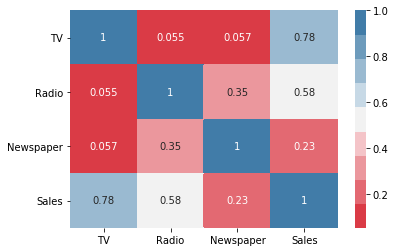

In [21]:
sn.heatmap(sales_df.corr(), annot = True, cmap=sn.diverging_palette(10, 240, n=9));

In [24]:
from sklearn.model_selection import train_test_split
x_features = ["TV", "Radio", "Newspaper"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    sales_df[x_features], sales_df["Sales"], train_size = 0.8, random_state=100
);

In [29]:
x_train.shape

(160, 3)

In [30]:
x_test.shape

(40, 3)

In [33]:
x_train.head(5)

,TV,Radio,Newspaper
168,215.4,23.6,57.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4
181,218.5,5.4,27.4
7,120.2,19.6,11.6


# Building a Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lreg_v1 = LinearRegression()

In [38]:
lreg_v1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lreg_v1.intercept_

2.8172751352949987

In [40]:
lreg_v1.coef_

array([0.0455864 , 0.18569816, 0.00223281])

In [41]:
dict(zip(x_features, lreg_v1.coef_))

{'TV': 0.04558639692301918,
 'Radio': 0.18569815745973386,
 'Newspaper': 0.00223281024101879}

### Predicting on test set

In [42]:
y_pred_v1 = lreg_v1.predict(x_test)

In [43]:
y_df_v1 = pd.DataFrame({'actual': y_test, 'predicted': y_pred_v1, 'residual': y_test - y_pred_v1})

In [44]:
y_df_v1.head(10)

,actual,predicted,residual
126,6.6,10.509488,-3.909488
104,20.7,20.057236,0.642764
99,17.2,16.826655,0.373345
92,19.4,19.094058,0.305942
111,21.8,20.943838,0.856162
167,12.2,13.253489,-1.053489
116,12.2,11.875545,0.324455
96,11.7,12.488264,-0.788264
52,22.6,20.514204,2.085796
69,22.3,20.913288,1.386712


### Measuring Metrics

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mse_v1 = mean_squared_error(y_df_v1.actual, y_df_v1.predicted)

In [47]:
mse_v1

1.7332927815807735

#### Calculating square root because mean squared error is calculated using squared of diff
mse = 1/NSum((Yactial - Ypredicted)2)

In [48]:
import numpy as np

In [49]:
rmse_v1 = np.sqrt(mse_v1)

In [50]:
rmse_v1

1.316545776485107

There will be + or - 1.316545776485107 error

Understanding if error is not acceptable<br>
1. May be only tv, radio or newspaper is not impacting sales. There will be more factors<br>
2. We may need to choose diff algo than linear regression.<br>

we can check r2 score <br>
r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_df_v1.actual, y_df_v1.predicted)

0.9184369032278497

### Ratio effect/multiply effect/Synergy effect

In [53]:
x_train['tv_radio'] = x_train['TV'] * x_train['Radio']

In [54]:
x_test['tv_radio'] = x_test['TV'] * x_test['Radio']

In [55]:
lreg_v2 = LinearRegression()

In [56]:
lreg_v2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
lreg_v2.intercept_

6.526834968018521

In [60]:
lreg_v2.coef_

array([0.01956588, 0.03095433, 0.00332366, 0.00106894])

In [62]:
x_features_v1 = ["TV", "Radio", "Newspaper", "tv_radio"]
dict(zip(x_features_v1, lreg_v2.coef_))

{'TV': 0.019565875590253745,
 'Radio': 0.030954329635318304,
 'Newspaper': 0.0033236581656322975,
 'tv_radio': 0.001068939678695223}

In [63]:
y_pred_v2 = lreg_v2.predict(x_test)

In [64]:
y_df_v2 = pd.DataFrame({'actual': y_test, 'predicted': y_pred_v2, 'residual': y_test - y_pred_v2})

In [65]:
y_df_v2.head(10)

,actual,predicted,residual
126,6.6,8.376087,-1.776087
104,20.7,21.000291,-0.300291
99,17.2,16.642004,0.557996
92,19.4,19.815116,-0.415116
111,21.8,22.327064,-0.527064
167,12.2,11.947994,0.252006
116,12.2,11.905926,0.294074
96,11.7,11.260280,0.439720
52,22.6,21.829286,0.770714
69,22.3,22.391670,-0.091670


In [66]:
mse_v2 = mean_squared_error(y_df_v2.actual, y_df_v2.predicted)

In [67]:
mse_v2

0.4261204649692688

In [68]:
rmse_v2 = np.sqrt(mse_v2)

In [69]:
rmse_v2

0.6527790322684

In [70]:
r2_score(y_df_v2.actual, y_df_v2.predicted)

0.979948162774217

In [71]:
residual = y_df_v2.actual - y_df_v2.predicted

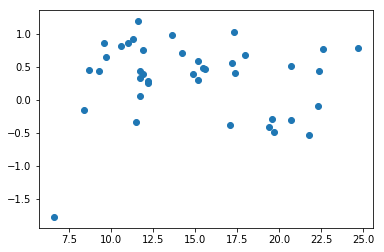

In [75]:
import matplotlib.pyplot as plt
plt.scatter(y_df_v2.actual, residual)
plt.scatter?

#### Above graph shows relationship between error and outcomes. Here outcomes is not biased by errors. If outcomes is biased by errors that model is bad fit even if we have high R2 score.

### Cross Validation

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
scores_v1 = cross_val_score(
    LinearRegression(),
    x_train,
    y_train,
    cv = 5, # number of cross validation, typically one group should contain more than 30 observation
    scoring = "r2"
)

In [78]:
scores_v1

array([0.96612485, 0.97087485, 0.96926517, 0.97593387, 0.93389054])

In [79]:
scores_v1.mean()

0.963217855147984

In [80]:
scores_v1.std()

0.015002924318523838

## Saving Model

In [81]:
from sklearn.externals import joblib

In [82]:
joblib.dump(lreg_v2, 'sales.pkl')

['sales.pkl']

In [83]:
!dir

 Volume in drive C is PC COE
 Volume Serial Number is F85D-F0B6

 Directory of C:\Users\parekhha\Documents\ML_training

05/16/2019  01:56 PM    <DIR>          .
05/16/2019  01:56 PM    <DIR>          ..
05/16/2019  09:44 AM    <DIR>          .ipynb_checkpoints
05/15/2019  06:14 PM           258,930 Cars Analyzing.ipynb
05/15/2019  03:20 PM    <DIR>          data
05/16/2019  09:09 AM           241,134 heart disease.ipynb
05/16/2019  12:21 PM            50,944 Notes.ipynb
05/16/2019  01:56 PM            91,746 Sales Prediction (Regression).ipynb
05/16/2019  01:56 PM               640 sales.pkl
05/15/2019  04:08 PM            54,731 stock self.ipynb
05/15/2019  03:50 PM           126,251 stocks.ipynb
05/15/2019  12:22 PM            42,038 Titanic.ipynb
               8 File(s)        866,414 bytes
               4 Dir(s)  114,960,183,296 bytes free
